# Hypothesis Testing (t-test or Z-test)
Hypthesis testing allows for rejecting (or failing to reject) the null hypothesis, which represents our default knowledge about the observed data, based on our observations. When testing the sample mean, the null hypothesis states that the population mean of this sample is equal to the population mean under the null hypothesis. Using a t-test, we can either reject this null hypothesis or fail to reject it.

**Error types**:
* **Type 1 error**: This is the case where we reject the null hypothesis when it is actually true. This error is limited by the test using the defined error rate $\alpha$, which is the maximum allowable probability of our sample being drawn from the null hypothesis population. A value of $\alpha=0.05$ means that that we reject the null hypothesis if the probability of our sample being drawn from the null hypothesis population does not exceed 0.05.
* **Type 2 error**: This is the case where we fail to reject the null hypothesis when it is actually false. The power of the test describes this error. Power is the probability of us rejecting the null hypothesis when it is indeed false. Therefore, 1-power is the probability of a type 2 error.

In this notebook, three types of hypothesis testing are experimented:
* **One sample test** where we compare the sample mean to the null hypothesis mean
* **Two sample tests** where we compare two samples and see if the means are unequal or one of the means is greater than the other. There are two types of a two sample test:
    * **Paired test**: Where the two samples are correlated.
    * **Independent test**: Where the two samples are independent.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import t, norm, chi2, ttest_ind, ttest_rel, ttest_1samp

## Power
[Link to lecture](https://github.com/bcaffo/MathematicsBiostatisticsBootCamp2/blob/master/lecture2.pdf)

* Power is the probability of rejecting the null hypothesis when, in fact, it is false. It is the conditional probability that, given the null hypothesis is false, we reject it. It is 1- the probability of accepting the null hypothesis when it is false (Type 2 error). Unlike the significance level alpha, this probability gives us information about how good our test is designed to be able to truly reject the null hypothesis. It is useful in determining the number of samples to use. On the other hand, we define the significance level to minimize the probability that we reject the null hypothesis falsely (due to chance).

* Note that because power computation is conditioned on the fact that the null hypothesis is false, the population mean is the alternative (unknown) population mean rather than the null hypothesis mean.

* We define alpha to protect ourselves from wrongly rejecting the null hypothesis. Power, given a fixed sample, is out of our hands. It will tell us the probability that we can reject the null hypothesis given that it is indeed false.

* Watch [this video](https://www.youtube.com/watch?v=NbeHZp23ubs) for further explanation of power.


<img src="https://github.com/YZouzou/statistics-with-bcaffo/raw/main/math_biostat_bootcamp2/img/hyp_test_viz.png" width=700 height=600 />

Lecture example:
$$ \text{Power} = P \left( Z + \frac{\sqrt{n}(\mu_a - 30)}{\sigma} > \frac{t_{1-\alpha,n-1}}{\sqrt{n-1}} \sqrt{\chi^2_{n-1}} \right) $$

In [2]:
# Lecture example
mu = 30 # Population mean under the null hypothesis
mu_a = 32 # The assumed mean of the real population, assuming the null hypothesis is rejected
n = 16 # Number of data in sample
std = 4 # Sample standard deviation

# Using Monte-Carlo simulation
n_trials = 10000

Z = norm.rvs(size=n_trials)
chi = chi2.rvs(df=n-1, size=n_trials)

side_1 = Z + np.sqrt(n) * (mu_a - mu) / std
side_2 = t.ppf(df=n-1, q=0.95) * np.sqrt(chi) / np.sqrt(n-1)

power = np.mean(side_1 > side_2)

print('Power = {:.2%}'.format(power))

Power = 60.30%


## One sample test
Applying a one sample test on temperature data from Turkey. In this test, the average temperature of one region is compared to the average temperature of the whole country, assuming that the country's average temperature is the population mean of temperatures in Turkey.

In [6]:
data = pd.read_csv('data/temperature_data.csv')
data['region'].unique()

array(['karadeniz', 'marmara', 'iç_anadolu', 'doğu_anadolu', 'ege',
       'güney_anadolu', 'akdeniz'], dtype=object)

1. Testing the significance of avg temperature difference between the mean temperature of Karadeniz (Black Sea region) and the mean temperature of Turkey

In [8]:
pop_mean = data['avg_temp'].mean()
print('Population mean: {:.3f}'.format(pop_mean))

region_name = 'karadeniz'
cond = data['region'] == region_name
region = data.loc[cond, 'avg_temp'].to_numpy()

region_mean = region.mean()
print('{} mean: {:.3f}'.format(region_name, region_mean))

Population mean: 14.058
karadeniz mean: 13.766


In [9]:
sample_std = region.std(ddof=1)
n = len(region)

stat = (region_mean - pop_mean) / (sample_std/np.sqrt(n))

pval_1 = t.cdf(x=stat, df=n-1)
pval_2 = 2*min(t.cdf(x=-stat, df=n-1), t.cdf(x=stat, df=n-1))

print('Statistic: {:.3f}'.format(stat))
print('One sided t-test p-value: {:.3f}'.format(pval_1))
print('Two sided t-test p-value: {:.3f}'.format(pval_2))

Statistic: -1.214
One sided t-test p-value: 0.113
Two sided t-test p-value: 0.225


In [11]:
# Using Scipy
print('One sided t-test: {}'.format(ttest_1samp(region, pop_mean, alternative='two-sided')))
print('Two sided t-test: {}'.format(ttest_1samp(region, pop_mean, alternative='less')))

One sided t-test: Ttest_1sampResult(statistic=-1.2136478447088352, pvalue=0.2251448979814565)
Two sided t-test: Ttest_1sampResult(statistic=-1.2136478447088352, pvalue=0.11257244899072825)


2. Testing the significance of avg temperature difference between the mean temperature of Akdeniz (Mediterranean Sea region) and the mean temperature of Turkey

In [12]:
pop_mean = data['avg_temp'].mean()
print('Population mean: {:.3f}'.format(pop_mean))

region_name = 'akdeniz'
cond = data['region'] == region_name
region = data.loc[cond, 'avg_temp'].to_numpy()

region_mean = region.mean()
print('{} mean: {:.3f}'.format(region_name, region_mean))

Population mean: 14.058
akdeniz mean: 19.776


In [13]:
sample_std = region.std(ddof=1)
n = len(region)

stat = (region_mean - pop_mean) / (sample_std/np.sqrt(n))

pval_1 = t.cdf(x=-stat, df=n-1)
pval_2 = 2*min(t.cdf(x=-stat, df=n-1), t.cdf(x=stat, df=n-1))

print('Statistic: {:.3f}'.format(stat))
print('One sided t-test p-value: {:.3f}'.format(pval_1))
print('Two sided t-test p-value: {:.3f}'.format(pval_2))

Statistic: 21.301
One sided t-test p-value: 0.000
Two sided t-test p-value: 0.000


In [15]:
# Using Scipy
print('One sided t-test: {}'.format(ttest_1samp(region, pop_mean, alternative='two-sided')))
print('Two sided t-test: {}'.format(ttest_1samp(region, pop_mean, alternative='greater')))

One sided t-test: Ttest_1sampResult(statistic=21.301072397410106, pvalue=1.8749241329558045e-79)
Two sided t-test: Ttest_1sampResult(statistic=21.301072397410106, pvalue=9.374620664779023e-80)


## Two-sample Test
[Link to lecture](https://github.com/bcaffo/MathematicsBiostatisticsBootCamp2/blob/master/lecture3.pdf)

### Case 1: Paired observations
Paired observations are observations where for every specimen, a test was conducted twice and the two test results are to be compared.

Ex:
* Testing two different drugs on the same patients
* Testing two different drugs on patients paired to have similar health conditions

#### Applying on temperature data:
The difference in temperature between 2005 and 2006, and 2018 and 2020 for the same station is to be tested by pairing the temperatures of the same months.

In [16]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year

In [19]:
# Grouping by station and finding the minimum and maximum years + num of years in between
# To 
def group_fun(x):
    col1 = x['year'].min()
    col2 = x['year'].max()
    col3 = x['year'].unique().shape[0]
    
    return pd.Series({
        'first_year': col1,
        'last_year': col2,
        'num_years': col3
    })


test = data.groupby('st_num').apply(group_fun).reset_index()

In [20]:
cond =(test['first_year'] < 2006) & (test['last_year'] > 2015)
test[cond]

,st_num,first_year,last_year,num_years
2,17045,2005,2020,10
10,17074,2005,2016,11
15,17088,2005,2020,12
18,17097,2005,2020,9
19,17099,2005,2020,13
21,17112,2005,2020,13
22,17116,2005,2020,14
28,17130,2005,2020,14
38,17190,2005,2020,14
40,17192,2005,2020,13


In [21]:
st_num = 17045
cond1 = data['st_num'] == st_num
cond2 = data['year'].isin([2005, 2006, 2018, 2020])
test = data[cond1 & cond2]

In [22]:
cond = test['year'].isin([2005, 2006])
old_temp = test.loc[cond, 'avg_temp'].to_numpy()

cond = test['year'].isin([2018, 2020])
new_temp = test.loc[cond, 'avg_temp'].to_numpy()

In [23]:
# Temperature difference
diff = new_temp - old_temp

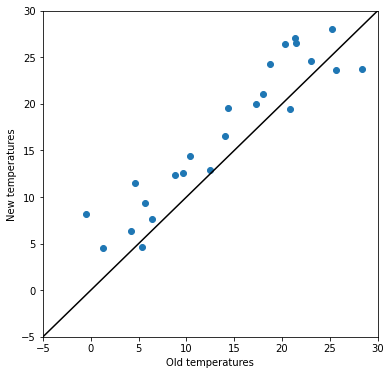

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(x=old_temp, y=new_temp)
plt.xlim(-5, 30)
plt.ylim(-5, 30)

x = [-5, 30]
plt.plot(x, x, color='black')

plt.xlabel('Old temperatures')
plt.ylabel('New temperatures')
plt.show()

There is evidence that the new temperatures are higher than the old temperatures.

Plotting the average of the paired temperatures against their differences

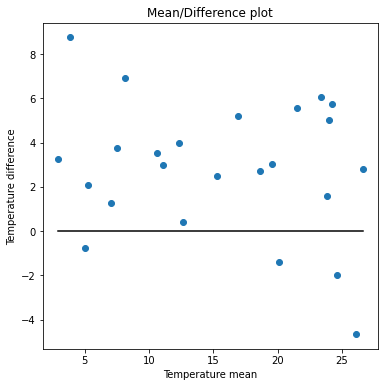

In [25]:
x = (old_temp + new_temp) / 2.
plt.figure(figsize=(6, 6))
plt.scatter(x=x, y=diff)
plt.xlabel('Temperature mean')
plt.ylabel('Temperature difference')

x = [x.min(), x.max()]
plt.plot(x, [0, 0], color='black')
plt.title('Mean/Difference plot')
plt.show()

After pairing two years of temperature measuremnents by month numbers, we have the difference in temperature vector ready. Our null hypothesis is that the population mean of this difference is zero, i.e., there is no significant difference in temperature in 13 years. 

In [26]:
std = diff.std()
n = diff.shape[0]

stat = (diff.mean() - 0.0) / (std / np.sqrt(n))

In [27]:
# Two sided t-test
p = 2*min(t.cdf(x=stat, df=n-1), t.cdf(x=-stat, df=n-1))
print('Statistic = {:.3f}'.format(stat))
print('P-value = {}'.format(p))

Statistic = 4.697
P-value = 9.909977009542864e-05


In [28]:
# Using Scipy
ttest_rel(new_temp, old_temp)

Ttest_relResult(statistic=4.597927733464128, pvalue=0.00012679616029034516)

In [29]:
# One sided t-test
# Assumption: New temperatures are higher than old temperatures
p = 1 - t.cdf(x=stat, df=n-1)
print('Statistic = {:.3f}'.format(stat))
print('P-value = {}'.format(p))

Statistic = 4.697
P-value = 4.9549885047794895e-05


In [30]:
# Using Scipy
ttest_rel(new_temp, old_temp, alternative='greater')

Ttest_relResult(statistic=4.597927733464128, pvalue=6.339808014517258e-05)

**Lecture example:**

Testing whether one exam was harder than the other based on student results

In [31]:
avg_diff = 2.88
n = 49
std = 7.61

stat = avg_diff / (std/np.sqrt(n))

# Two sided t-test
p = 2*min(t.cdf(x=stat, df=n-1), t.cdf(x=-stat, df=n-1))
print('Two sided test p-value = {:.3f}'.format(p))
print('\n')

# One sided t-test
# Assumption: The first exam --> student marks are higher
p = 1 - t.cdf(x=stat, df=n-1)
print('One sided test p-value = {:.3f}'.format(p))

Two sided test p-value = 0.011


One sided test p-value = 0.005


### Case 2: Two independent groups

Comparing temperatures from two different regions in Turkey, Karadeniz (Black Sea) and Akdeniz (Mediterranean Sea)

In [33]:
cond = data['region'] == 'karadeniz'
region1 = data.loc[cond, 'avg_temp'].to_numpy()

cond = data['region'] == 'akdeniz'
region2 = data.loc[cond, 'avg_temp'].to_numpy()

pop_mean = data['avg_temp'].mean()
print('Population mean = {:.2f}'.format(pop_mean))

group1_mean = region1.mean()
print('Group 1 mean = {:.2f}'.format(group1_mean))

group2_mean = region2.mean()
print('Group 2 mean = {:.2f}'.format(group2_mean))

Population mean = 14.06
Group 1 mean = 13.77
Group 2 mean = 19.78


Creating confidence intervals for each group mean

In [34]:
n1 = len(region1)
st_error1 = region1.std() / np.sqrt(n1)
n2 = len(region2)
st_error2 = region2.std() / np.sqrt(n2)

t_p = t.ppf(0.975, df=n1-1)
norm_p = norm.ppf(0.975)

CI_1_t = group1_mean + t_p*np.array([-1, 1]) * st_error1
CI_1_norm = group1_mean + norm_p*np.array([-1, 1]) * st_error1

print('Group 1 CI:')
print('Sample mean: {:.3f}'.format(group1_mean))
print('T-distribution: {}'.format(CI_1_t))
print('Norm distribution: {}'.format(CI_1_norm))
print('\n')

t_p = t.ppf(0.975, df=n2-1)
norm_p = norm.ppf(0.975)

CI_2_t = group2_mean + t_p*np.array([-1, 1]) * st_error2
CI_2_norm = group2_mean + norm_p*np.array([-1, 1]) * st_error2

print('Group 2 CI:')
print('Sample mean: {:.3f}'.format(group2_mean))
print('T-distribution: {}'.format(CI_2_t))
print('Norm distribution: {}'.format(CI_2_norm))

Group 1 CI:
Sample mean: 13.766
T-distribution: [13.29466332 14.23830371]
Norm distribution: [13.29518675 14.23778028]


Group 2 CI:
Sample mean: 19.776
T-distribution: [19.249464   20.30261933]
Norm distribution: [19.25029494 20.30178839]


Notice that the confidence intervals using a t-distribution and a normal distribution are almost identical. This is due to the large dataset size which translates to a large degree of freedom fot the t-distribution (t-distributions approach normal distributions as their DF increases)

In [36]:
# Using Scipy
t.interval(alpha=0.95, df=n1-1, loc=group1_mean, scale=st_error1)

(13.29466332271924, 14.238303710247793)

In [37]:
t.interval(alpha=0.95, df=n2-1, loc=group2_mean, scale=st_error2)

(19.24946399911519, 20.302619334218146)

Checking if the population variance of the two groups is equal using bootstrapping. (According to Brian Caffo's comment in the lecture)

In [40]:
# The numpy variance function divides by n instead of n-1 by default
var1 = region1.var(ddof=1)
var2 = region2.var(ddof=1)

print('Group 1 sample variance: {:.3f}'.format(var1))
print('Group 2 sample variance: {:.3f}'.format(var2))
print('Variance ratio (Group1/Group2): {:.3f}'.format(var1/var2))

Group 1 sample variance: 63.199
Group 2 sample variance: 55.333
Variance ratio (Group1/Group2): 1.142


In [41]:
n = 10000

var_ratio_list = np.zeros(n)

for i in range(n):
    bs_sample1 = np.random.choice(region1, size=region1.shape)
    bs_sample2 = np.random.choice(region2, size=region2.shape)
    
    var_ratio = bs_sample1.var(ddof=1) / bs_sample2.var(ddof=1)
    var_ratio_list[i] = var_ratio

In [42]:
mu = var_ratio_list.mean()
var = var_ratio_list.var(ddof=1)
sd = np.sqrt(var)

CI = np.array([np.quantile(var_ratio_list, 0.025), np.quantile(var_ratio_list, 0.975)])
print('Variance ratio bootstrap mean = {:.3f}'.format(mu))
print('95% Confidence Interval: {}'.format(CI))

Variance ratio bootstrap mean = 1.144
95% Confidence Interval: [1.03576912 1.26120171]


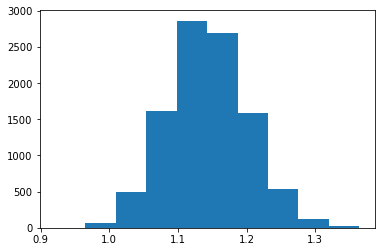

In [43]:
plt.hist(var_ratio_list)
plt.show()

Variances seem to be different

#### 1. T-test assuming the variances are equal

In [44]:
# T-test assuming the variances are equal
# Computing the pooled variance which is an estimate of the population variance
var1 = region1.var(ddof=1)
var2 = region2.var(ddof=1)

n1 = len(region1)
n2 = len(region2)

# Pooled variance
var = ((n1-1)*var1 + (n2-1)*var2) / (n1 + n2 - 2)
sd = np.sqrt(var)

# Mean difference
mu = region1.mean() - region2.mean()

# Statistic
stat = (mu - 0)/(sd*np.sqrt(1/n1 + 1/n2))

In [45]:
p_val = min(t.cdf(x=-stat, df=n1+n2-2), t.cdf(x=stat, df=n1+n2-2))*2

# Computing the confidence interval of the mean difference
q = t.ppf(q=0.975, df=n1+n2-2)
CI = mu + np.array([-1, 1])*q*(sd*np.sqrt(1/n1 + 1/n2))

print('Statistic: {:.3f}'.format(stat))
print('P-value assuming equal variance: {:.3f}'.format(p_val))
print('Mean difference CI: {}'.format(CI))

Statistic: -16.481
P-value assuming equal variance: 0.000
Mean difference CI: [-6.72470925 -5.29440705]


In [47]:
# Using Scipy
ttest_ind(region1, region2)

Ttest_indResult(statistic=-16.480706561505382, pvalue=4.623214251788798e-57)

#### 2. T-test assuming the variances are unequal

In [48]:
# Degree of freedom of the student t distribution in the case of unequal variances
def deg_freedom(var1, var2, n1, n2):
    # Variance divided by the number of samples
    sn1 = var1/n1
    sn2 = var2/n2

    df = (sn1 + sn2)**2 / ((sn1**2)/(n1-1) + (sn2**2)/(n2-1))
    
    return df

In [49]:
# T-test assuming the variances are different
var1 = region1.var(ddof=1)
var2 = region2.var(ddof=1)
sd1 = np.sqrt(var1)
sd2 = np.sqrt(var2)

n1 = len(region1)
n2 = len(region2)

# Mean difference
mu = region1.mean() - region2.mean()

# Statistic
stat = (mu - 0)/np.sqrt(var1/n1 + var2/n2)

# T-distribution degrees of freedom
df = deg_freedom(var1, var2, n1, n2)

In [50]:
p_val = min(t.cdf(x=-stat, df=df), t.cdf(x=stat, df=df))*2

# Computing the confidence interval of the mean difference
q = t.ppf(q=0.975, df=df)
CI = mu + np.array([-1, 1])*q*np.sqrt(var1/n1 + var2/n2)

print('Statistic: {:.3f}'.format(stat))
print('P-value assuming equal variance: {:.3f}'.format(p_val))
print('Mean difference CI: {}'.format(CI))

Statistic: -16.672
P-value assuming equal variance: 0.000
Mean difference CI: [-6.71652287 -5.30259343]


In [51]:
# Using Scipy
ttest_ind(region1, region2, equal_var=False)

Ttest_indResult(statistic=-16.672447535923112, pvalue=5.868871514659742e-58)

### Regression to the mean
Ex: If students were to take a test about a subject they are unfamiliar with, the mean of their scores would be around 50. However, some students will still receive high and low score. If given the test another time, the mean score of students who scored high will decrease and the mean score of students who scored low will increase. The reason is that randomness plays a significant role in determining the score of a student in this case, assuming the students have no background about the test. In a perfect test, however, where each student will always get the same score based on his/her knowledge, randomness will have no role in determining the score of a student and therefore regression to the mean does not occur.

See [this video by Veritasium](https://www.youtube.com/watch?v=1tSqSMOyNFE) on the subject of regression to the mean.

In [52]:
# Observing regression to the mean in the previous example of temperatures
norm_old_temp = (old_temp - old_temp.mean()) / old_temp.std()
norm_new_temp = (new_temp - new_temp.mean()) / new_temp.std()

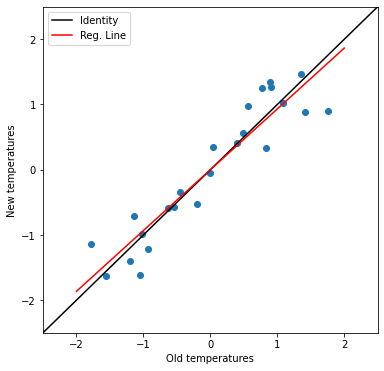

In [53]:
plt.figure(figsize=(6, 6))
plt.scatter(x=norm_old_temp, y=norm_new_temp)
plt.xlim(-2.5, +2.5)
plt.ylim(-2.5, +2.5)

x = [-5, +5]
plt.plot(x, x, color='black', label='Identity')

# Plotting regression line
# Correlation coefficient does not change by normalizing data
corr_coef = np.corrcoef(norm_old_temp, norm_new_temp)[0, 1]
x = np.linspace(-2, 2, 10)
y = corr_coef * x
plt.plot(x, y, color='red', label='Reg. Line')

plt.xlabel('Old temperatures')
plt.ylabel('New temperatures')
plt.legend()
plt.show()

As we can see the regression line and the identity line are almost the same, therefore regression to the mean is not pronounced here. The reason here is that an extremely low temperature occurs in winter month and will be acompanied with a low temperature too in another year.